In [29]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy

In [30]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

Consider the second-order differential equation

$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta-q\frac{d\theta}{dt}+Fsin(\Omega_D t)$

We can rewrite this as two coupled first-order equations:

$\frac{dy_0}{dt} = y_1$

$\frac{dy_1}{dt} = -\frac{g}{l}sin(y_0)-qy_1+Fsin(\Omega_D t)$

for the variables defined as $y_0 = \theta$ and $y_1 = \frac{d\theta}{dt}$


In [31]:
# Define the system of ODEs

def pendulum(t, y, g, l, q, F, OmegaD):
    return [y[1], -g/l * np.sin(y[0]) - q*y[1] + F*np.sin(OmegaD*t)]

In [32]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0 # Resistive force, q = a / ml
F = 0 # Driving force amplitude, F = G / ml^2
OmegaD = 2/3 # Frequency of the driving force (s^-1)

In [33]:
# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

## Plotting solutions for 10 natural periods of oscillations

In [36]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 10
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

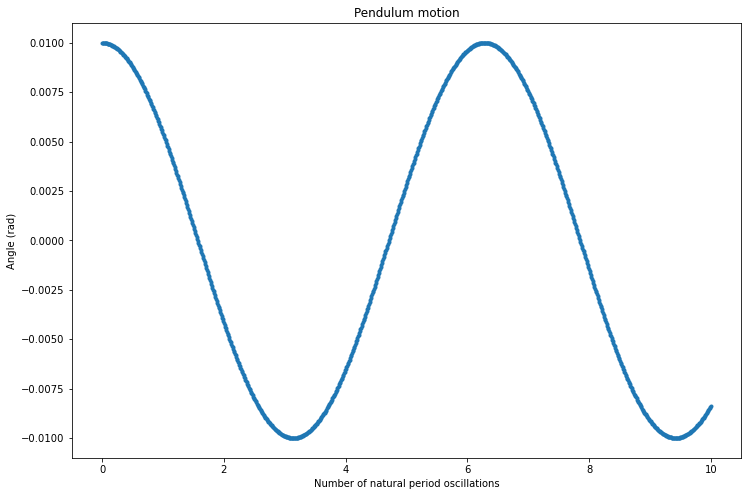

In [51]:
# Plot the motion of the pendulum

t = np.linspace(0, 10, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(t, theta, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.title('Pendulum motion');

## Plotting solutions for 100 natural periods of oscillations

In [52]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

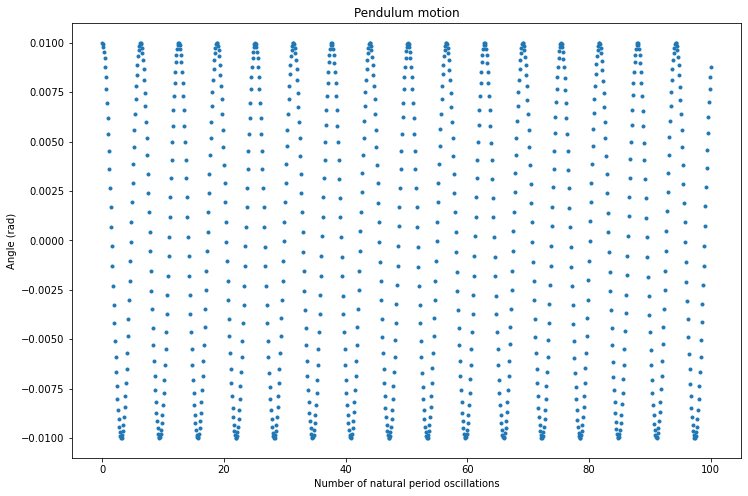

In [53]:
# Plot the motion of the pendulum

t = np.linspace(0, 100, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(t, theta, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.title('Pendulum motion');

## Plotting solutions for 1000 natural periods of oscillations

In [78]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 1000
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

Text(0.5, 1.0, 'Pendulum motion')

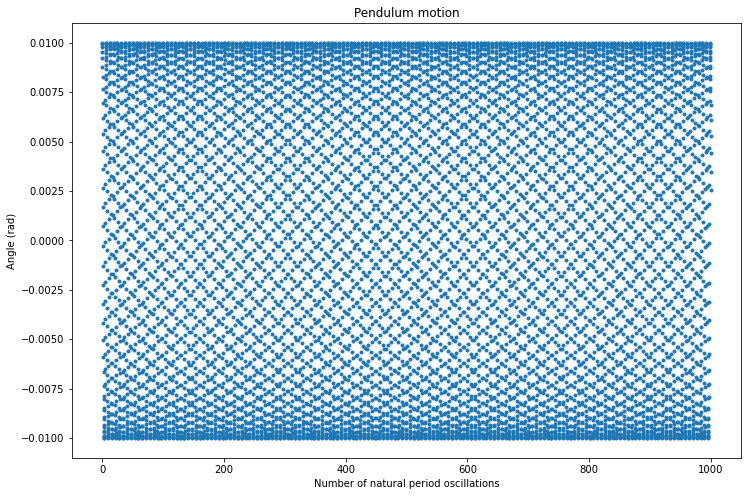

In [86]:
# Plot the motion of the pendulum

t = np.linspace(0, 1000, 10000)
theta, omega = pendulum_motion.sol(t)

## Plot only half of the data points to avoid cluttering the plot
# plt.figure(figsize=(16, 8))
# plt.plot(t[::3], theta[::3], '.')


plt.figure(figsize=(12, 8))
plt.plot(t, theta, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.title('Pendulum motion')

# Overlaying theoretical results for small-angle oscillations

--

# Is the energy conserved with the integrator?

Expression for total energy is given by

$E = T + U$, where

$T = \frac{1}{2}I\omega^2$, and

$U = mgh$

In [93]:
## Calculate total energy of the pendulum vs time for 10,000 oscillations

# Integrate the ODEs using scipy solve_ivp (method RK45 by default)
t_max = 10000
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Obtain the motion of the pendulum
t = np.linspace(0, 10000, 10000)
theta, omega = pendulum_motion.sol(t)

# Calculate the total energy of the pendulum
m = 1 # Mass of the pendulum, set to 1 for simplicity (absorbed within the definition of F)
T = 0.5 * m * l**2 * omega**2 # Kinetic energy
U = m * g * l * (1 - np.cos(theta)) # Potential energy (h = l(1 - cos(theta))
E = T+U # Total energy

10000


Text(0.5, 1.0, 'Pendulum motion')

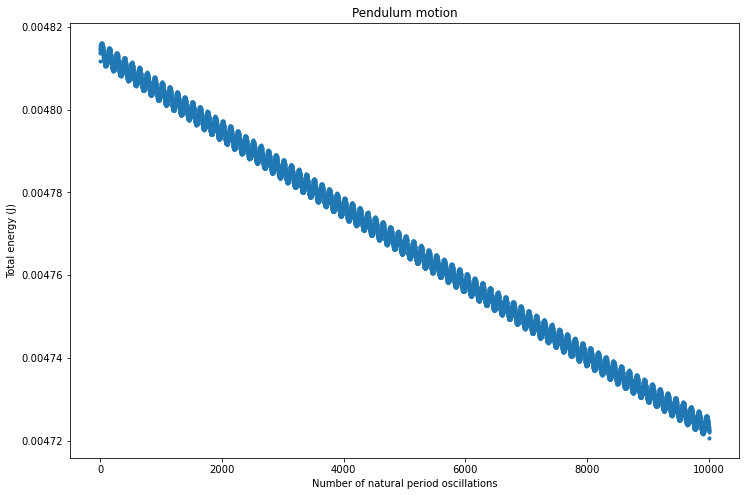

In [94]:
## Plot total energy of the pendulum vs time for 10,000 oscillations

# Plot the total energy of the pendulum
plt.figure(figsize=(12, 8))
plt.plot(t, E, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Total energy (J)')
plt.title('Pendulum motion')

In [98]:
(E[0] - E[-1])/E[0]*100

1.8944465561321309

Conclusion: For 10,000 oscillations, the total energy of the system is not conserved from the integrator, changing by about 2%.

Text(0.5, 1.0, 'Pendulum motion')

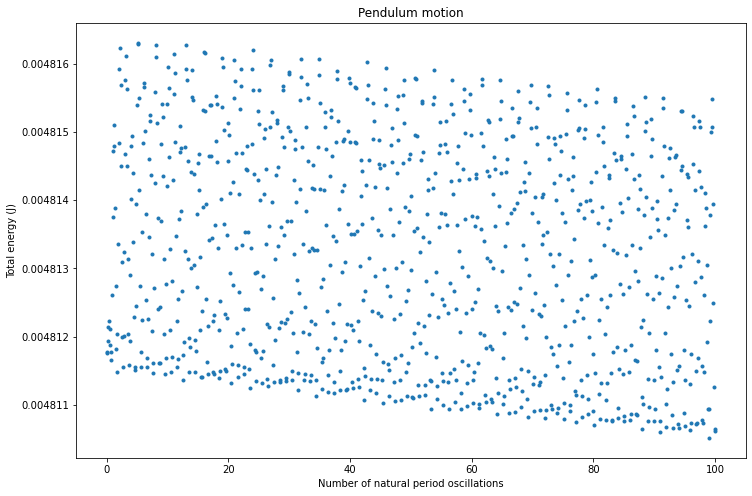

In [100]:
## Calculate total energy of the pendulum vs time for 100 oscillations

# Integrate the ODEs using scipy solve_ivp (method RK45 by default)
t_max = 100
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Obtain the motion of the pendulum
t = np.linspace(0, 100, 1000)
theta, omega = pendulum_motion.sol(t)

# Calculate the total energy of the pendulum
m = 1 # Mass of the pendulum, set to 1 for simplicity (absorbed within the definition of F)
T = 0.5 * m * l**2 * omega**2 # Kinetic energy
U = m * g * l * (1 - np.cos(theta)) # Potential energy (h = l(1 - cos(theta))
E = T+U # Total energy

## Plot total energy of the pendulum vs time for 100 oscillations

# Plot the total energy of the pendulum
plt.figure(figsize=(12, 8))
plt.plot(t, E, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Total energy (J)')
plt.title('Pendulum motion')

In [101]:
(E[0] - E[-1])/E[0]*100

0.023755498069193453

Conclusion: For 100 oscillations, the total energy of the system is still not conserved from the integrator, albeit less, changing by about 0.02%.

# How does the amplitude of undriven, undamped oscillations affect the period?